IMPORTING LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, OneHotEncoder

DATASET

In [2]:
df = pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [4]:
df.isnull().any()

Age                         False
Attrition                   False
BusinessTravel              False
DailyRate                   False
Department                  False
DistanceFromHome            False
Education                   False
EducationField              False
EmployeeCount               False
EmployeeNumber              False
EnvironmentSatisfaction     False
Gender                      False
HourlyRate                  False
JobInvolvement              False
JobLevel                    False
JobRole                     False
JobSatisfaction             False
MaritalStatus               False
MonthlyIncome               False
MonthlyRate                 False
NumCompaniesWorked          False
Over18                      False
OverTime                    False
PercentSalaryHike           False
PerformanceRating           False
RelationshipSatisfaction    False
StandardHours               False
StockOptionLevel            False
TotalWorkingYears           False
TrainingTimesL

VISUALIZATION

ATTRITUTION COUNT

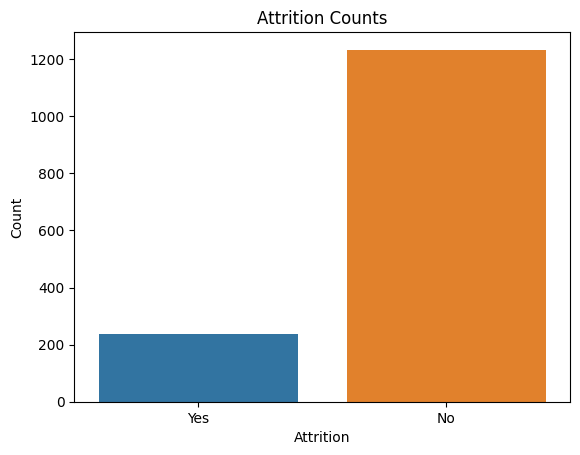

In [5]:
sns.countplot(x='Attrition', data=df)
plt.title('Attrition Counts')
plt.xlabel('Attrition')
plt.ylabel('Count')
plt.show()

DISTRIBUTION OF AGE

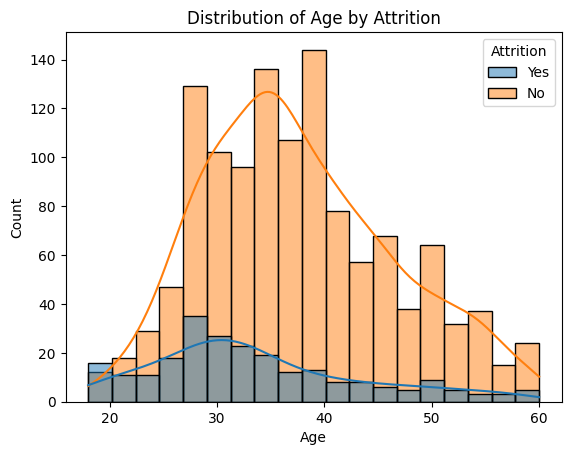

In [6]:
sns.histplot(data=df, x='Age', hue='Attrition', kde=True)
plt.title('Distribution of Age by Attrition')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

In [19]:
y = df['Attrition']

X = df.drop('Attrition', axis=1)

In [20]:
X_encoded = pd.get_dummies(X, drop_first=True)

In [9]:
X_encoded

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
0,41,1102,1,2,1,1,2,94,3,2,...,0,0,0,0,0,1,0,0,1,1
1,49,279,8,1,1,2,3,61,2,2,...,0,0,0,0,1,0,0,1,0,0
2,37,1373,2,2,1,4,4,92,2,1,...,1,0,0,0,0,0,0,0,1,1
3,33,1392,3,4,1,5,4,56,3,1,...,0,0,0,0,1,0,0,1,0,1
4,27,591,2,1,1,7,1,40,3,1,...,1,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,884,23,2,1,2061,3,41,4,2,...,1,0,0,0,0,0,0,1,0,0
1466,39,613,6,1,1,2062,4,42,2,3,...,0,0,0,0,0,0,0,1,0,0
1467,27,155,4,3,1,2064,2,87,4,2,...,0,0,1,0,0,0,0,1,0,1
1468,49,1023,2,3,1,2065,4,63,2,2,...,0,0,0,0,0,1,0,1,0,0


In [21]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_scaled = scaler.fit_transform(X_encoded)

X_scaled_df = pd.DataFrame(X_scaled, columns=X_encoded.columns)

In [11]:
X_scaled_df

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
0,0.547619,0.715820,0.000000,0.25,0.0,0.000000,0.333333,0.914286,0.666667,0.25,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0
1,0.738095,0.126700,0.250000,0.00,0.0,0.000484,0.666667,0.442857,0.333333,0.25,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,0.452381,0.909807,0.035714,0.25,0.0,0.001451,1.000000,0.885714,0.333333,0.00,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
3,0.357143,0.923407,0.071429,0.75,0.0,0.001935,1.000000,0.371429,0.666667,0.00,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
4,0.214286,0.350036,0.035714,0.00,0.0,0.002903,0.000000,0.142857,0.666667,0.00,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,0.428571,0.559771,0.785714,0.25,0.0,0.996613,0.666667,0.157143,1.000000,0.25,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1466,0.500000,0.365784,0.178571,0.00,0.0,0.997097,1.000000,0.171429,0.333333,0.50,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1467,0.214286,0.037938,0.107143,0.50,0.0,0.998065,0.333333,0.814286,1.000000,0.25,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1468,0.738095,0.659270,0.035714,0.50,0.0,0.998549,1.000000,0.471429,0.333333,0.25,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

MODEL BUILDING

LOGISTIC REGRESSION

In [13]:
from sklearn.linear_model import LogisticRegression
logistic_model = LogisticRegression(random_state=42)
logistic_model.fit(X_train, y_train)
logistic_predictions = logistic_model.predict(X_test)

ACCURACY:

In [16]:
from sklearn.metrics import accuracy_score, classification_report
logistic_accuracy = accuracy_score(y_test, logistic_predictions)
logistic_report = classification_report(y_test, logistic_predictions)

print("Logistic Regression Model Accuracy:", logistic_accuracy)
print("Logistic Regression Model Classification Report:")
print(logistic_report)

Logistic Regression Model Accuracy: 0.891156462585034
Logistic Regression Model Classification Report:
              precision    recall  f1-score   support

          No       0.91      0.97      0.94       255
         Yes       0.67      0.36      0.47        39

    accuracy                           0.89       294
   macro avg       0.79      0.67      0.70       294
weighted avg       0.88      0.89      0.88       294



DECISSION TREE

In [17]:
from sklearn.tree import DecisionTreeClassifier
decision_tree_model = DecisionTreeClassifier(random_state=42)
decision_tree_model.fit(X_train, y_train)
decision_tree_predictions = decision_tree_model.predict(X_test)

ACCURACY:

In [18]:
decision_tree_accuracy = accuracy_score(y_test, decision_tree_predictions)
decision_tree_report = classification_report(y_test, decision_tree_predictions)

print("Decision Tree Model Accuracy:", decision_tree_accuracy)
print("Decision Tree Model Classification Report:")
print(decision_tree_report)

Decision Tree Model Accuracy: 0.7721088435374149
Decision Tree Model Classification Report:
              precision    recall  f1-score   support

          No       0.87      0.86      0.87       255
         Yes       0.17      0.18      0.17        39

    accuracy                           0.77       294
   macro avg       0.52      0.52      0.52       294
weighted avg       0.78      0.77      0.78       294

